# TP1 - Anomaly Detection

In [1]:
import numpy as np
np.set_printoptions(threshold=10000, suppress = True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 1. Sur la BDD Mouse

## 1.1. Téléchargement et Analyse des données

### Importation des données

In [2]:
data = pd.read_csv('Data/mouse.txt',sep=' ', names=['x1', 'x2'])

In [3]:
data

x1        x2
0    0.456601  0.432806
1    0.611378  0.528625
2    0.450299  0.711606
3    0.639015  0.460744
4    0.628957  0.323470
..        ...       ...
495  0.151506  0.876586
496  0.860308  0.633833
497  0.862083  0.591805
498  0.916030  0.523391
499  0.427325  0.833767

[500 rows x 2 columns]

### Descriptif des données

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
data.head()

x1        x2
0  0.456601  0.432806
1  0.611378  0.528625
2  0.450299  0.711606
3  0.639015  0.460744
4  0.628957  0.323470

### Les anomalies

In [6]:
data[-10:]

x1        x2
490  0.290950  0.855767
491  0.750068  0.897028
492  0.040555  0.507240
493  0.835162  0.138940
494  0.174740  0.363686
495  0.151506  0.876586
496  0.860308  0.633833
497  0.862083  0.591805
498  0.916030  0.523391
499  0.427325  0.833767

## 1.2. Représentation Graphique des données

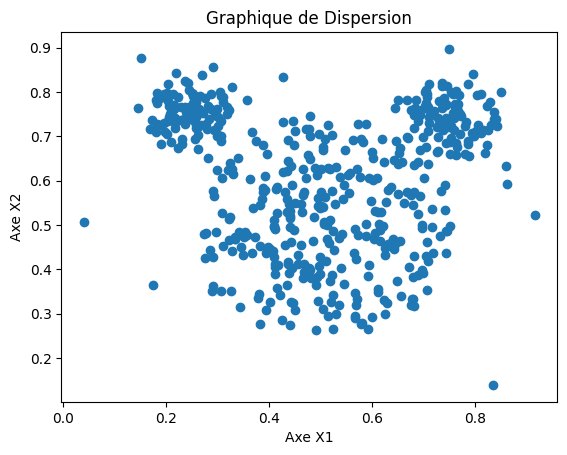

In [7]:
# Créer un graphique de dispersion
plt.scatter(data['x1'], data['x2'])

# Ajouter des étiquettes aux axes
plt.xlabel('Axe X1')
plt.ylabel('Axe X2')

# Donner un titre au graphique
plt.title('Graphique de Dispersion')

# Afficher le graphique
plt.show()

## 1.3. Isolation Forest

In [8]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(random_state=1)
IF.fit(data)
decision_IF = IF.decision_function(data)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  2.,  2.,  4.,  1.,  0.,
         3.,  2.,  6.,  2.,  6.,  6.,  7., 14.,  5., 14., 13., 12., 17.,
        19., 24., 24., 33., 43., 59., 56., 50., 43., 16.,  8.]),
 array([-0.2251206 , -0.21921355, -0.21330651, -0.20739946, -0.20149241,
        -0.19558537, -0.18967832, -0.18377128, -0.17786423, -0.17195719,
        -0.16605014, -0.1601431 , -0.15423605, -0.148329  , -0.14242196,
        -0.13651491, -0.13060787, -0.12470082, -0.11879378, -0.11288673,
        -0.10697968, -0.10107264, -0.09516559, -0.08925855, -0.0833515 ,
        -0.07744446, -0.07153741, -0.06563037, -0.05972332, -0.05381627,
        -0.04790923, -0.04200218, -0.03609514, -0.03018809, -0.02428105,
        -0.018374  , -0.01246695, -0.00655991, -0.00065286,  0.00525418,
         0.01116123,  0.01706827,  0.02297532,  0.02888236,  0.03478941,
         0.04069646,  0.0466035 ,  0.05251055,  0.05841759,

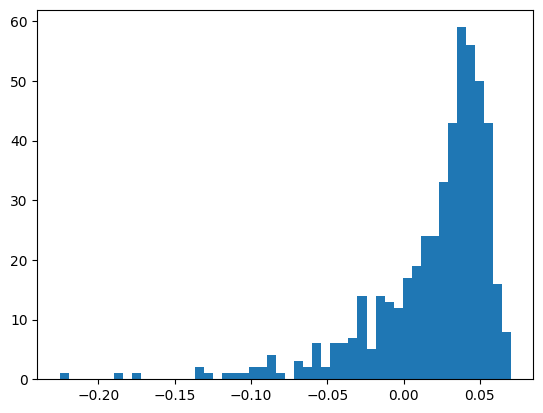

In [9]:
plt.hist(decision_IF, bins=50)

In [10]:
score_decision_IF = decision_IF.copy()
seuil_IF = -0.10
decision_IF[score_decision_IF <= seuil_IF] = 1
decision_IF[score_decision_IF > seuil_IF] = 0

In [11]:
anomalies_IF = int(sum(decision_IF))
print(f"nombre d'anomalies détectées avec LOF : {anomalies_IF} ")
decision_IF[-10:]

nombre d'anomalies détectées avec LOF : 10 


array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

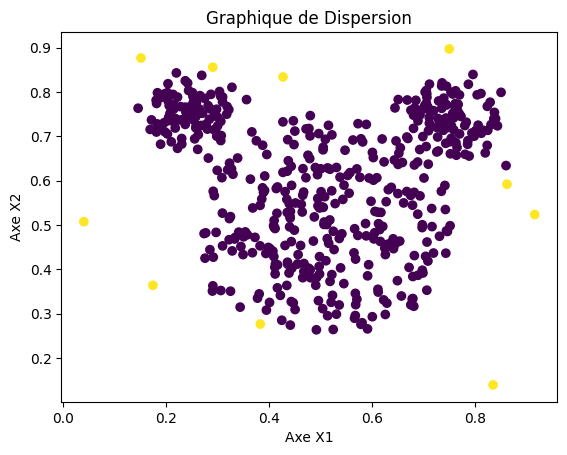

In [12]:
# Créer un graphique de dispersion
plt.scatter(data['x1'], data['x2'], c=decision_IF)

# Ajouter des étiquettes aux axes
plt.xlabel('Axe X1')
plt.ylabel('Axe X2')

# Donner un titre au graphique
plt.title('Graphique de Dispersion')

# Afficher le graphique
plt.show()

## 1.4. Local Outlier Factor (LOF)

In [13]:
from sklearn.neighbors import LocalOutlierFactor
LOF = LocalOutlierFactor()
LOF.fit(data)
decision_LOF = LOF.negative_outlier_factor_

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   4.,   6.,
          9.,  15.,  30.,  58., 174., 194.]),
 array([-4.28280669, -4.21594981, -4.14909293, -4.08223605, -4.01537916,
        -3.94852228, -3.8816654 , -3.81480852, -3.74795164, -3.68109476,
        -3.61423787, -3.54738099, -3.48052411, -3.41366723, -3.34681035,
        -3.27995347, -3.21309659, -3.1462397 , -3.07938282, -3.01252594,
        -2.94566906, -2.87881218, -2.8119553 , -2.74509841, -2.67824153,
        -2.61138465, -2.54452777, -2.47767089, -2.41081401, -2.34395713,
        -2.27710024, -2.21024336, -2.14338648, -2.0765296 , -2.00967272,
        -1.94281584, -1.87595895, -1.80910207, -1.74224519, -1.67538831,
        -1.60853143, -1.54167455, -1.47481767, -1.40796078, -1.3411039 ,
 

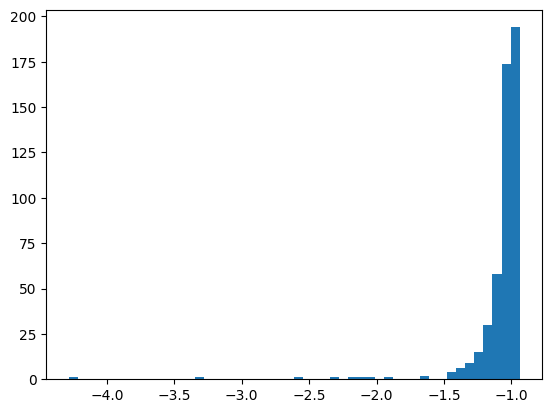

In [14]:
plt.hist(decision_LOF, bins=50)

In [15]:
score_decision_LOF = decision_LOF.copy()
seuil_LOF = -1.5
decision_LOF[score_decision_LOF <= seuil_LOF] = 1
decision_LOF[score_decision_LOF > seuil_LOF] = 0

In [16]:
anomalies_LOF = int(sum(decision_LOF))
print(f"nombre d'anomalies détectées avec LOF : {anomalies_LOF} ")
decision_LOF[-10:]

nombre d'anomalies détectées avec LOF : 10 


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

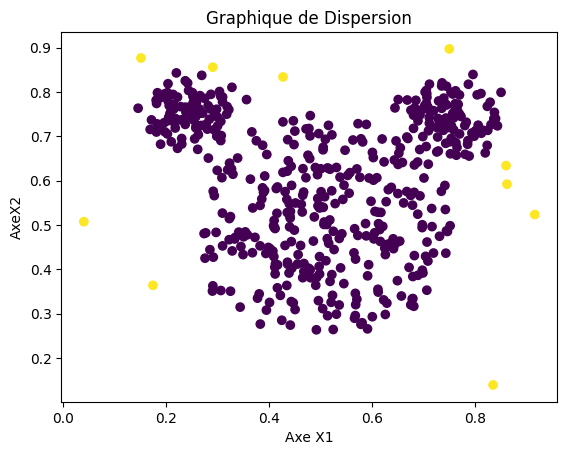

In [17]:
# Créer un graphique de dispersion
plt.scatter(data['x1'], data['x2'], c=decision_LOF)

# Ajouter des étiquettes aux axes
plt.xlabel('Axe X1')
plt.ylabel('AxeX2')

# Donner un titre au graphique
plt.title('Graphique de Dispersion')

# Afficher le graphique
plt.show()

## 1.4. Comparaison des résultats

In [18]:
(decision_IF == 1).sum()

np.int64(10)

In [19]:
(decision_LOF == 1).sum()

np.int64(10)

# 2. Jeu de données CreditCard

## 2.1. Extraction et Préparation des données

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
# Charger le jeu de données
df = pd.read_csv("Data/creditcard.csv")

# Aperçu des premières lignes
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

Dimensions : (284807, 31)
Valeurs manquantes : 0
Taux de fraude : 0.173%


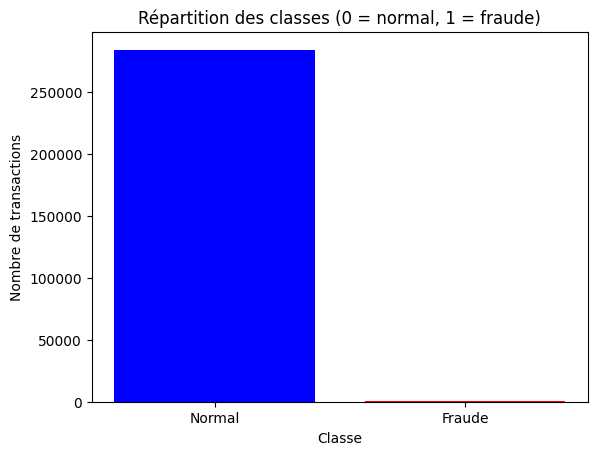

In [22]:
# Dimensions du dataset
print("Dimensions :", df.shape)

# Vérification des valeurs manquantes
valeursManquantes = df.isnull().sum().sum()
print(f"Valeurs manquantes : {valeursManquantes}")

# Suppression de la colonne 'Time' (non pertinente pour la détection)
if 'Time' in df.columns:
    df = df.drop(columns=['Time'])

# Vérification de la distribution de la variable cible
fraud_rate = df['Class'].mean() * 100
print(f"Taux de fraude : {fraud_rate:.3f}%")

# Visualisation de la répartition des classes
classes = df['Class'].value_counts().sort_index()
plt.bar(classes.index, classes.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.title("Répartition des classes (0 = normal, 1 = fraude)")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()


In [23]:
# Séparation X / y
X = df.drop(columns=['Class'])
y = df['Class']

print("Taille de X :", X.shape)
print("Taille de y :", y.shape)


Taille de X : (284807, 29)
Taille de y : (284807,)


In [24]:
# Découpage stratifié pour garder la proportion de fraudes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1
)

print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


Taille du jeu d'entraînement : (199364, 29)
Taille du jeu de test : (85443, 29)


In [25]:
# Normalisation standard des variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Données normalisées avec StandardScaler.")


Données normalisées avec StandardScaler.


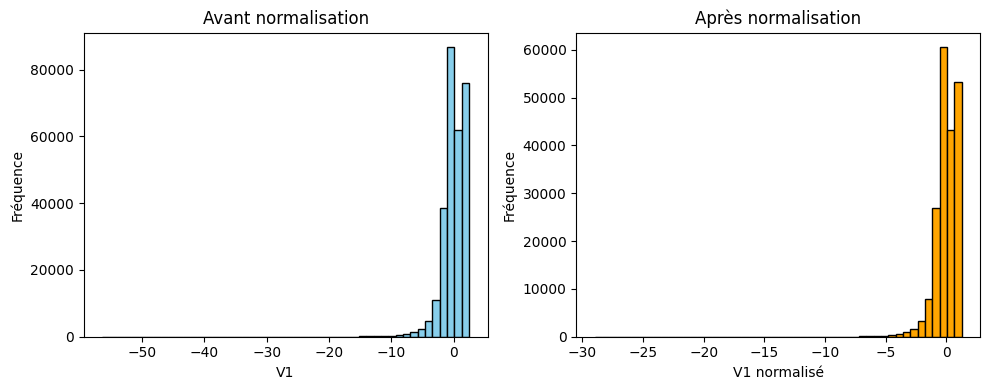

In [26]:
# Exemple de distribution d'une variable avant/après normalisation
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X['V1'], bins=50, color='skyblue', edgecolor='black')
plt.title("Avant normalisation")
plt.xlabel("V1")
plt.ylabel("Fréquence")

plt.subplot(1,2,2)
plt.hist(X_train_scaled[:, 0], bins=50, color='orange', edgecolor='black')
plt.title("Après normalisation")
plt.xlabel("V1 normalisé")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


## 2.2 Développement des modèles

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
from sklearn.utils import resample


In [28]:
def eval_binary(y_true, y_pred, y_score=None):
    """Calcule les métriques principales de classification binaire."""
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0)
    }
    if y_score is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_score)
    return metrics


In [29]:
# Régression logistique standard
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_score_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
res_lr = eval_binary(y_test, y_pred_lr, y_score_lr)

# Forêt aléatoire standard
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_score_rf = rf.predict_proba(X_test)[:, 1]
res_rf = eval_binary(y_test, y_pred_rf, y_score_rf)

print("Régression logistique :", res_lr)
print("Forêt aléatoire :", res_rf)


Régression logistique : {'accuracy': 0.9993211848834895, 'precision': 0.8947368421052632, 'recall': 0.6891891891891891, 'f1': 0.7786259541984732, 'roc_auc': 0.9805762354182543}
Forêt aléatoire : {'accuracy': 0.9996254813150287, 'precision': 0.9393939393939394, 'recall': 0.8378378378378378, 'f1': 0.8857142857142857, 'roc_auc': 0.958152350427689}


In [30]:
# 1 RandomForest avec poids équilibrés
rf_bal = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_bal.fit(X_train, y_train)
y_pred_bal = rf_bal.predict(X_test)
y_score_bal = rf_bal.predict_proba(X_test)[:, 1]
res_bal = eval_binary(y_test, y_pred_bal, y_score_bal)

# 2 Sur-échantillonnage de la classe minoritaire
train_df = X_train.copy()
train_df['Class'] = y_train
fraudes = train_df[train_df['Class'] == 1]
normales = train_df[train_df['Class'] == 0]

fraudes_sur = resample(fraudes, replace=True, n_samples=len(normales), random_state=42)
train_over = pd.concat([normales, fraudes_sur])
X_over = train_over.drop(columns=['Class'])
y_over = train_over['Class']

rf_over = RandomForestClassifier(n_estimators=100, random_state=42)
rf_over.fit(X_over, y_over)
y_pred_over = rf_over.predict(X_test)
y_score_over = rf_over.predict_proba(X_test)[:, 1]
res_over = eval_binary(y_test, y_pred_over, y_score_over)

# 3 Sous-échantillonnage de la classe majoritaire
normales_under = resample(normales, replace=False, n_samples=len(fraudes)*3, random_state=42)
train_under = pd.concat([fraudes, normales_under])
X_under = train_under.drop(columns=['Class'])
y_under = train_under['Class']

rf_under = RandomForestClassifier(n_estimators=100, random_state=42)
rf_under.fit(X_under, y_under)
y_pred_under = rf_under.predict(X_test)
y_score_under = rf_under.predict_proba(X_test)[:, 1]
res_under = eval_binary(y_test, y_pred_under, y_score_under)

print("RandomForest balanced :", res_bal)
print("RandomForest oversampled :", res_over)
print("RandomForest undersampled :", res_under)


RandomForest balanced : {'accuracy': 0.9995786664794073, 'precision': 0.9307692307692308, 'recall': 0.8175675675675675, 'f1': 0.8705035971223022, 'roc_auc': 0.9650860368546048}
RandomForest oversampled : {'accuracy': 0.999602073897218, 'precision': 0.9253731343283582, 'recall': 0.8378378378378378, 'f1': 0.8794326241134752, 'roc_auc': 0.9680721755814081}
RandomForest undersampled : {'accuracy': 0.9931884414170851, 'precision': 0.19, 'recall': 0.8986486486486487, 'f1': 0.3136792452830189, 'roc_auc': 0.9819850186079156}


In [31]:
contamination = y.mean()  # proportion de fraudes (~0.0017)

# Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
iso.fit(X_train_scaled)
scores_if = -iso.decision_function(X_test_scaled)
th_if = np.quantile(scores_if, 1 - contamination)
y_pred_if = (scores_if >= th_if).astype(int)
res_if = eval_binary(y_test, y_pred_if, scores_if)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=contamination)
lof.fit(X_train_scaled)
scores_lof = -lof.decision_function(X_test_scaled)
th_lof = np.quantile(scores_lof, 1 - contamination)
y_pred_lof = (scores_lof >= th_lof).astype(int)
res_lof = eval_binary(y_test, y_pred_lof, scores_lof)

print("Isolation Forest :", res_if)
print("Local Outlier Factor :", res_lof)


Isolation Forest : {'accuracy': 0.997471998876444, 'precision': 0.2702702702702703, 'recall': 0.2702702702702703, 'f1': 0.2702702702702703, 'roc_auc': 0.9573952799742704}
Local Outlier Factor : {'accuracy': 0.9965005910372997, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'roc_auc': 0.47196399459427774}


                 Modèle  accuracy  precision    recall        f1   roc_auc
0   Logistic Regression  0.999321   0.894737  0.689189  0.778626  0.980576
1          RandomForest  0.999625   0.939394  0.837838  0.885714  0.958152
2           RF Balanced  0.999579   0.930769  0.817568  0.870504  0.965086
3        RF Oversampled  0.999602   0.925373  0.837838  0.879433  0.968072
4       RF Undersampled  0.993188   0.190000  0.898649  0.313679  0.981985
5      Isolation Forest  0.997472   0.270270  0.270270  0.270270  0.957395
6  Local Outlier Factor  0.996501   0.000000  0.000000  0.000000  0.471964


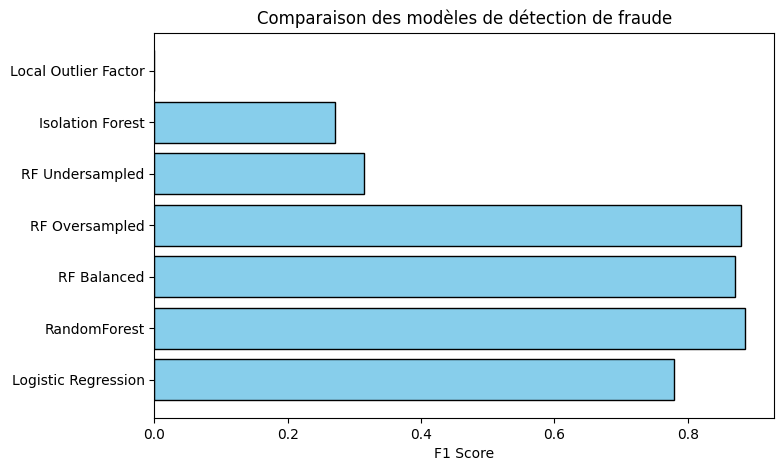

In [32]:
# Regrouper tous les résultats
results = pd.DataFrame([
    {"Modèle": "Logistic Regression", **res_lr},
    {"Modèle": "RandomForest", **res_rf},
    {"Modèle": "RF Balanced", **res_bal},
    {"Modèle": "RF Oversampled", **res_over},
    {"Modèle": "RF Undersampled", **res_under},
    {"Modèle": "Isolation Forest", **res_if},
    {"Modèle": "Local Outlier Factor", **res_lof},
])

print(results)

# Visualisation simple des AUC ROC
plt.figure(figsize=(8,5))
plt.barh(results["Modèle"], results["f1"], color='skyblue', edgecolor='black')
plt.xlabel("F1 Score")
plt.title("Comparaison des modèles de détection de fraude")
plt.show()
